# Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import the Dataset

In [2]:
df = pd.read_csv('Mall_Customers.csv')

# Dataset Overview

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# EDA

# 1) Manual

Text(0.5, 1.0, 'Features Correlation Heatmap')

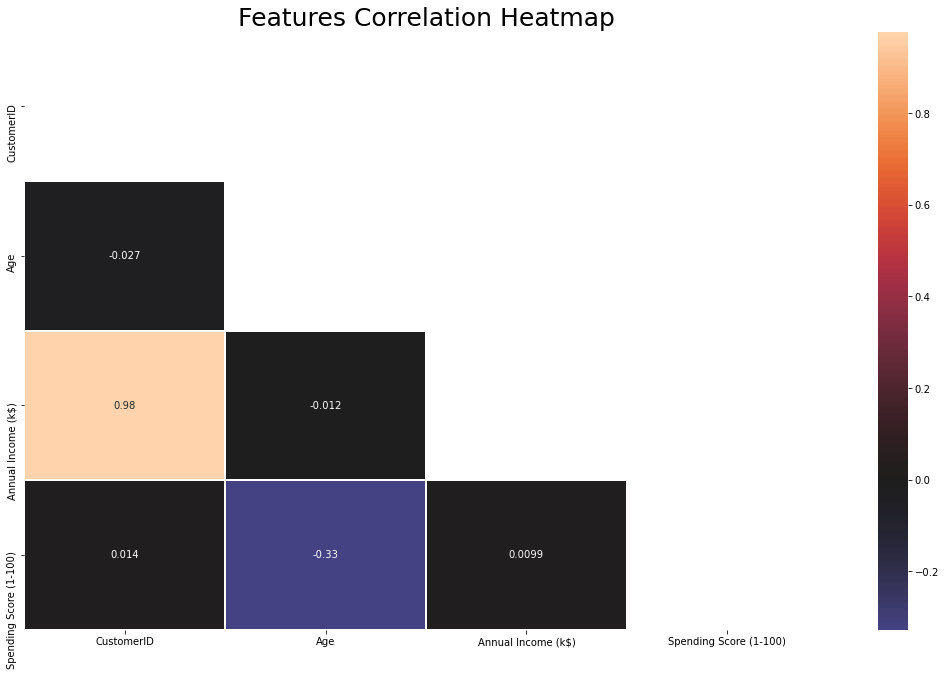

In [5]:
plt.figure(figsize=(18, 11))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(),center= 0, annot=True, linewidth=0.8, mask=matrix)

plt.title('Features Correlation Heatmap', fontsize = 25)

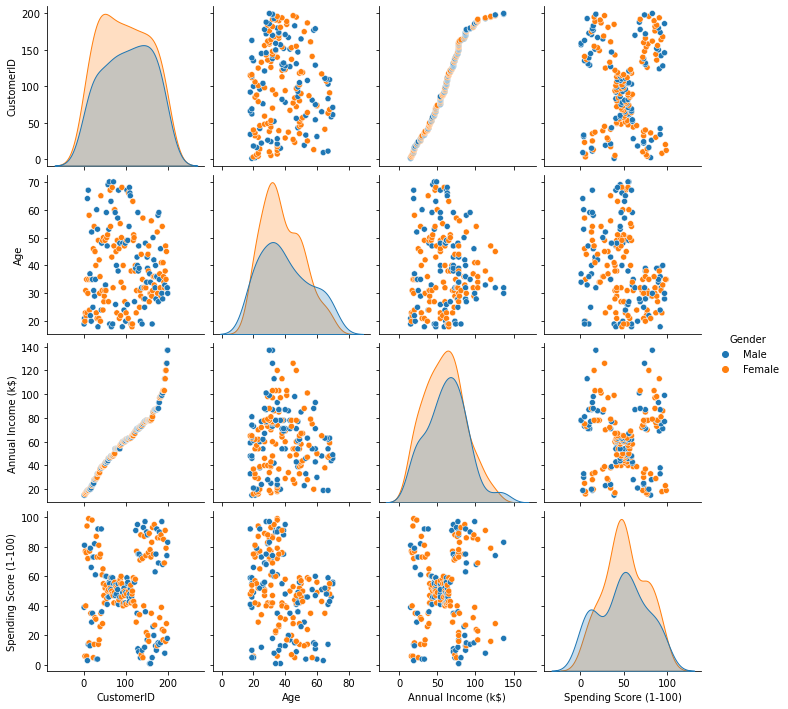

In [6]:
sns.pairplot(df, hue = 'Gender')

Text(0.5, 1.1, 'Gender Countplot')

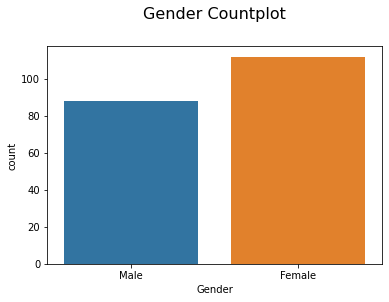

In [7]:
sns.countplot(data = df, x = 'Gender')
plt.title('Gender Countplot', fontsize = 16, y = 1.1)

<AxesSubplot:xlabel='Gender', ylabel='Spending Score (1-100)'>

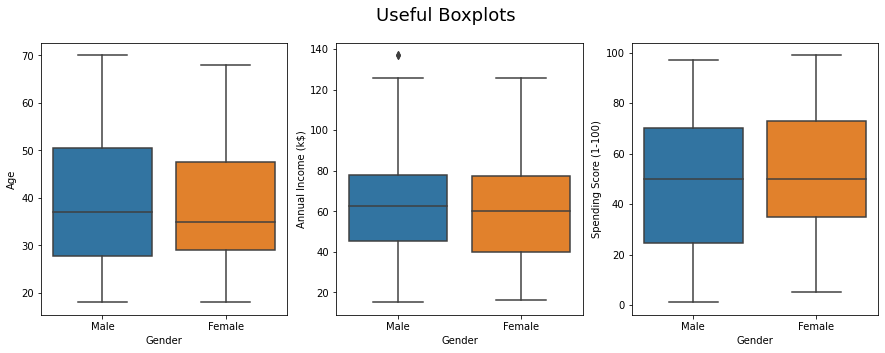

In [8]:
fig, axes = plt.subplots(1,3, figsize = (15,5))
fig.suptitle('Useful Boxplots', fontsize = 18)

sns.boxplot(data = df, x = 'Gender', y = 'Age', ax = axes[0])
sns.boxplot(data = df, x = 'Gender', y = 'Annual Income (k$)', ax = axes[1])
sns.boxplot(data = df, x = 'Gender', y = 'Spending Score (1-100)', ax = axes[2])

# 2) Pandas Profiling

In [9]:
import pandas_profiling as pp

In [10]:
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Cleaning

In [11]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [12]:
df.drop(['CustomerID','Gender'],axis=1, inplace=True)

In [13]:
df

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


# K-Means Clustering

In [14]:
#libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### scaling

In [15]:
X1 = df.drop('Age', axis = 1)
X2 = df.drop('Annual Income (k$)', axis = 1)
X3 = df.drop('Spending Score (1-100)', axis = 1)

In [16]:
scaler = StandardScaler()
scaled_X1 = scaler.fit_transform(X1)
scaled_X2 = scaler.fit_transform(X2)
scaled_X3 = scaler.fit_transform(X3)

In [17]:
scaled_df = scaler.fit_transform(df)

### X1

In [18]:
ssd1 = []

for i in range(2, 11):
    
    model=KMeans(n_clusters=i, random_state=101)
    model.fit(scaled_X1)
    
    ssd1.append(model.inertia_)

Text(0, 0.5, 'Sum of Squared Distances')

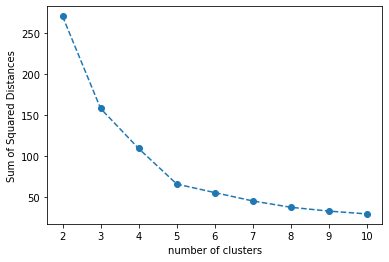

In [19]:
plt.plot(range(2,11), ssd1, 'o--')
plt.xlabel('number of clusters')
plt.ylabel('Sum of Squared Distances')

5 is the best number of clusters

In [20]:
X1_model = KMeans(n_clusters=5, random_state=101)

In [21]:
X1_model.fit(scaled_X1)

KMeans(n_clusters=5, random_state=101)

In [22]:
X1_labels = X1_model.labels_
X1_centroids = X1_model.cluster_centers_

In [23]:
X1['labels'] = X1_labels

In [24]:
X1_centroids

array([[-0.20091257, -0.02645617],
       [ 0.99158305,  1.23950275],
       [ 1.05500302, -1.28443907],
       [-1.32954532,  1.13217788],
       [-1.30751869, -1.13696536]])

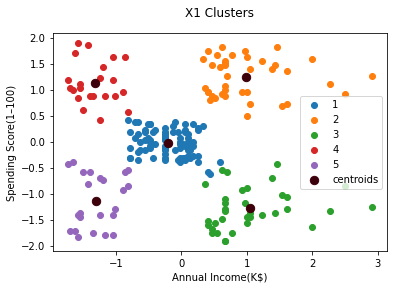

In [25]:
for i in range(0,5):
    plt.scatter(scaled_X1[X1_labels == i , 0] , scaled_X1[X1_labels == i , 1] , label = i+1)
plt.scatter(X1_centroids[:,0], X1_centroids[:,1], s = 70, c = '#3d000a', label = 'centroids')
plt.title('X1 Clusters', y = 1.05)
plt.xlabel('Annual Income(K$)')
plt.ylabel('Spending Score(1–100)')
plt.legend()

### X2

In [26]:
ssd2 = []

for i in range(2, 11):
    
    model=KMeans(n_clusters=i, random_state=101)
    model.fit(scaled_X2)
    
    ssd2.append(model.inertia_)

Text(0, 0.5, 'Sum of Squared Distances')

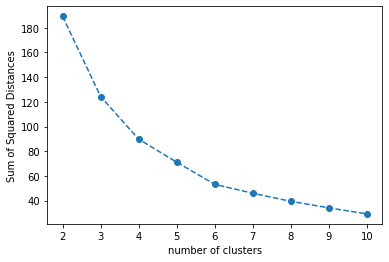

In [27]:
plt.plot(range(2,11), ssd2, 'o--')
plt.xlabel('number of clusters')
plt.ylabel('Sum of Squared Distances')


6 is the best number of clusters

In [28]:
X2_model = KMeans(n_clusters=6, random_state=101)

In [29]:
X2_model.fit(scaled_X2)

KMeans(n_clusters=6, random_state=101)

In [30]:
X2_labels = X2_model.labels_
X2_centroids = X2_model.cluster_centers_

In [31]:
X2['labels'] = X2_labels

In [32]:
X2_centroids

array([[-0.98830286,  0.01062485],
       [ 1.00613779, -1.40702839],
       [-0.62254456,  1.24814723],
       [ 0.59071744, -0.16514902],
       [-0.37103379, -1.31216875],
       [ 1.86593393, -0.01358755]])

Text(0, 0.5, 'Spending Score(1–100)')

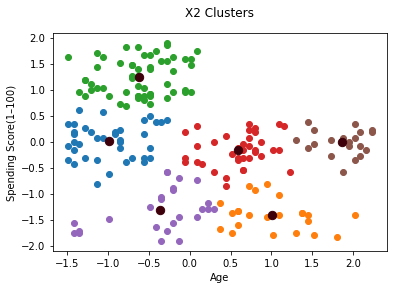

In [33]:
for i in range(0,6):
    plt.scatter(scaled_X2[X2_labels == i , 0] , scaled_X2[X2_labels == i , 1] , label = i+1)
plt.scatter(X2_centroids[:,0], X2_centroids[:,1], s = 70, c = '#3d000a', label = 'centroids')
plt.title('X2 Clusters', y = 1.05)
plt.xlabel('Age')
plt.ylabel('Spending Score(1–100)')
#plt.legend()

### X3

In [34]:
ssd3 = []

for i in range(2, 11):
    
    model=KMeans(n_clusters=i, random_state=101)
    model.fit(scaled_X3)
    
    ssd3.append(model.inertia_)

Text(0, 0.5, 'Sum of Squared Distances')

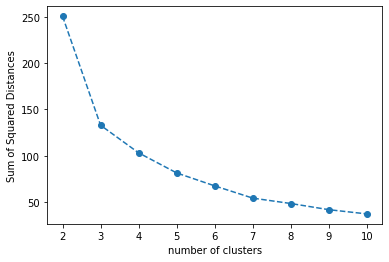

In [35]:
plt.plot(range(2,11), ssd3, 'o--')
plt.xlabel('number of clusters')
plt.ylabel('Sum of Squared Distances')

3 is the best number of clusters

In [36]:
X3_model = KMeans(n_clusters=3, random_state=101)

In [37]:
X3_model.fit(scaled_X3)

KMeans(n_clusters=3, random_state=101)

In [38]:
X3_labels = X3_model.labels_
X3_centroids = X3_model.cluster_centers_

In [39]:
X3['labels'] = X3_labels

In [40]:
X3_centroids

array([[-0.87474334, -0.83093616],
       [ 1.2169084 , -0.35628084],
       [-0.27913465,  0.96851913]])

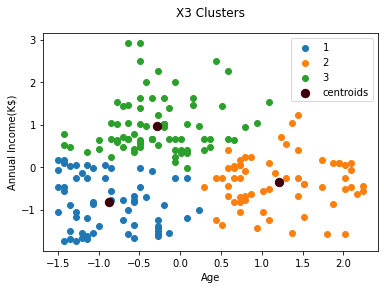

In [41]:
for i in range(0,3):
    plt.scatter(scaled_X3[X3_labels == i , 0] , scaled_X3[X3_labels == i , 1] , label = i+1)
plt.scatter(X3_centroids[:,0], X3_centroids[:,1], s = 70, c = '#3d000a', label = 'centroids')
plt.title('X3 Clusters', y = 1.05)
plt.xlabel('Age')
plt.ylabel('Annual Income(K$)')
plt.legend()

### df

In [42]:
ssdf = []

for i in range(2, 11):
    
    model=KMeans(n_clusters=i, random_state=101)
    model.fit(scaled_df)
    
    ssdf.append(model.inertia_)

Text(0, 0.5, 'Sum of Squared Distances')

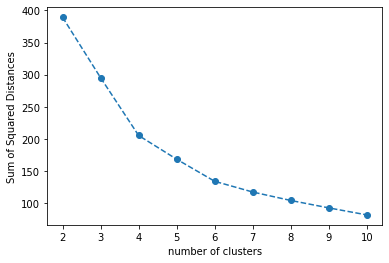

In [43]:
plt.plot(range(2,11), ssdf, 'o--')
plt.xlabel('number of clusters')
plt.ylabel('Sum of Squared Distances')

6 is the best number of clusters

In [44]:
df_model = KMeans(n_clusters=6, random_state=101)

In [45]:
df_model.fit(scaled_df)

KMeans(n_clusters=6, random_state=101)

In [46]:
df_labels = df_model.labels_
df_centroids = df_model.cluster_centers_

In [47]:
df['labels'] = df_labels

In [48]:
df_centroids

array([[-0.86515664, -0.13196835, -0.08043031],
       [ 1.25472096, -0.24021294, -0.04399777],
       [ 0.47895722, -1.30822992, -1.19644353],
       [-0.44191719,  0.99158305,  1.23950275],
       [ 0.22171558,  1.08322527, -1.29005223],
       [-0.99396865, -1.34734766,  1.06404834]])

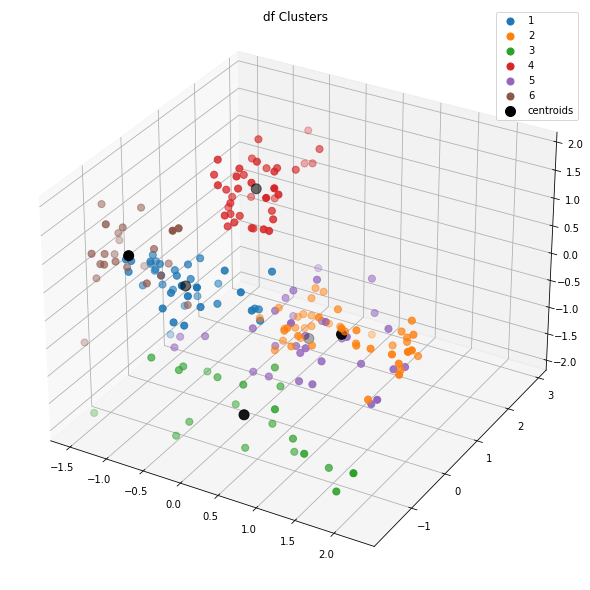

In [49]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,8))
ax = Axes3D(fig)

u_labels = np.unique(df_labels)

for i in u_labels:
    
    ax.scatter(scaled_df[df_labels == i , 0],
               scaled_df[df_labels == i , 1],
               scaled_df[df_labels == i , 2],
               label = i+1, s = 50)
    
ax.scatter(df_centroids[:,0], df_centroids[:,1], df_centroids[:,2], s = 100, c = '0', label = 'centroids')

plt.title('df Clusters', y = 1.05)
plt.legend()

In [50]:
from sklearn.decomposition import PCA

In [51]:
df = pd.read_csv('Mall_Customers.csv')

In [52]:
df.drop('CustomerID', axis=1, inplace=True)

In [53]:
df = pd.get_dummies(df, drop_first=True)

In [54]:
df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


In [55]:
scaled_df = scaler.fit_transform(df)

In [56]:
explained_variance = []

for i in range(1,5):
    pca = PCA(n_components = i)
    pca.fit(scaled_df)
    
    explained_variance.append(np.sum(pca.explained_variance_ratio_))

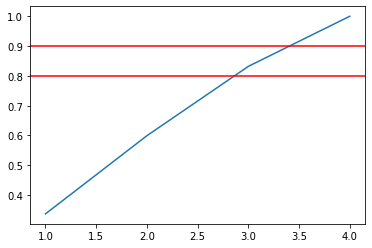

In [57]:
plt.plot(range(1,5), explained_variance)
plt.axhline(0.9, c='r')
plt.axhline(0.8, c='r')

In [58]:
explained_variance

[0.33690045571012517, 0.5992069019819845, 0.831813287884595, 1.0]

In [59]:
pca = PCA(n_components = 3)
pca.fit(scaled_df)

PCA(n_components=3)

In [60]:
pca_samples = pca.transform(scaled_df)

In [61]:
pca_df = pd.DataFrame(pca_samples)

In [62]:
#k-means
scaled_pca_df = scaler.fit_transform(pca_df)

In [63]:
ssdp = []

for i in range(2, 11):
    
    model=KMeans(n_clusters=i)
    model.fit(scaled_pca_df)
    
    ssdp.append(model.inertia_)

Text(0, 0.5, 'Sum of Squared Distances')

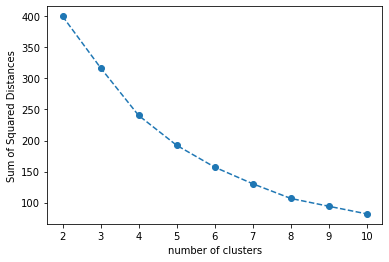

In [64]:
plt.plot(range(2,11), ssdp, 'o--')
plt.xlabel('number of clusters')
plt.ylabel('Sum of Squared Distances')

5 is the best number of clusters

In [65]:
pca_df_model = KMeans(n_clusters=5, random_state=101)

In [66]:
pca_df_model.fit(scaled_pca_df)

KMeans(n_clusters=5, random_state=101)

In [67]:
pca_df_labels = pca_df_model.labels_
pca_df_centroids = pca_df_model.cluster_centers_

In [68]:
pca_df['labels'] = pca_df_labels

In [69]:
pca_df_centroids

array([[-0.64823366,  0.5557689 ,  1.2533987 ],
       [-0.71387276,  0.78784467, -1.13939625],
       [ 0.58599349, -0.89821244,  0.65236261],
       [ 1.17042296,  0.53733452, -0.64827421],
       [-0.95460616, -1.02674935, -0.0413663 ]])

Text(0.5, 1.0, 'Features Correlation Heatmap')

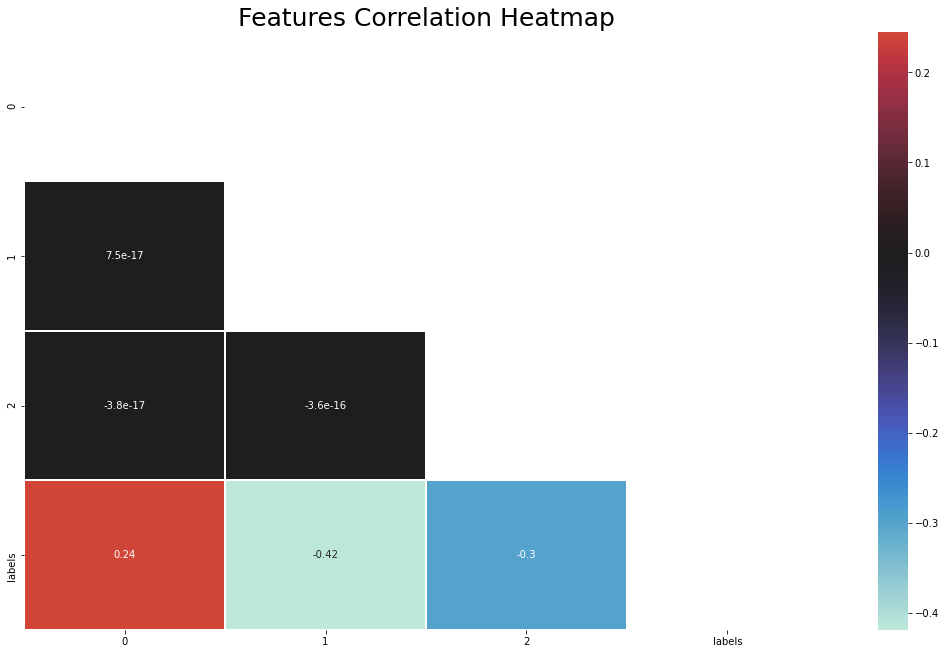

In [70]:
plt.figure(figsize=(18, 11))
matrix = np.triu(pca_df.corr())
sns.heatmap(pca_df.corr(),center= 0, annot=True, linewidth=0.8, mask=matrix)

plt.title('Features Correlation Heatmap', fontsize = 25)